# Kobe bryant shot selection

## 1. Data load

In [1]:
#https://www.kaggle.com/c/kobe-bryant-shot-selection/data
import pandas as pd

data = pd.read_csv("data.csv")

In [2]:
print("total number of shots =",len(data))
data.head()

total number of shots = 30697


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
for col in data.columns:
    print(col)

action_type
combined_shot_type
game_event_id
game_id
lat
loc_x
loc_y
lon
minutes_remaining
period
playoffs
season
seconds_remaining
shot_distance
shot_made_flag
shot_type
shot_zone_area
shot_zone_basic
shot_zone_range
team_id
team_name
game_date
matchup
opponent
shot_id


In [4]:
# 'shot_made_flag'가 shot이 들어갔는지의 여부 == target_varaible
data.shot_made_flag.head()

0    NaN
1    0.0
2    1.0
3    0.0
4    1.0
Name: shot_made_flag, dtype: float64

- 실제 진행되었던 competition에서는 NaN을 예측하여 제출하는 형식
- NaN에 대한 정답 label이 없기 때문에, NaN이 아닌 shots 데이터만 사용!


In [5]:
# NaN 데이터 분리
data = data[data.shot_made_flag.isnull()==False] # 같은 표현 : data = data.dropna()
print(data.shot_made_flag.head())

# data 개수 확인
print("total number of labeled shots = ",len(data))

1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
Name: shot_made_flag, dtype: float64
total number of labeled shots =  25697


### 만약 정답 label이 있는 데이터를 train과 test를 나누려면

In [6]:
from sklearn.model_selection import train_test_split

X = data.ix[:,data.columns != 'shot_made_flag'].copy() # 'shot_made_flag'를 제외한 모든 columns를 선택
y = data.shot_made_flag.copy()

# train_test_split
trn_x, tst_x, trn_y, tst_y = train_test_split(X, y, test_size=0.3, random_state =42)

C:\Users\namso_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 나눠진 data 개수 체크
print('# of trn_x = ',len(trn_x))
print('# of trn_y = ',len(trn_y))
print('# of tst_x = ',len(tst_x))
print('# of tst_y = ',len(tst_y))

# of trn_x =  17987
# of trn_y =  17987
# of tst_x =  7710
# of tst_y =  7710


## 2. Data Exploration and Visualization
- 데이터에는 어떤 feature들이 있는지 확인해보자

In [8]:
for i, feature in enumerate(trn_x.columns):
    print(i,feature)

0 action_type
1 combined_shot_type
2 game_event_id
3 game_id
4 lat
5 loc_x
6 loc_y
7 lon
8 minutes_remaining
9 period
10 playoffs
11 season
12 seconds_remaining
13 shot_distance
14 shot_type
15 shot_zone_area
16 shot_zone_basic
17 shot_zone_range
18 team_id
19 team_name
20 game_date
21 matchup
22 opponent
23 shot_id


## 2-1 Action type

In [9]:
action_shot = []
for action in set(trn_x.action_type):
    action_shot.append((action, len(trn_x[trn_x.action_type == action]), sum(trn_y[trn_x.action_type == action])))

In [11]:
# action_shot list 구조 확인 : 'action_type', '해당 action type으로 쏜 모든 슛', '해당 action type으로 들어간 슛'
action_shot[1]

('Running Slam Dunk Shot', 1, 1.0)

In [10]:
# 슛 성공률에 따라 정렬 - lambda function
action_shot.sort(key= lambda x: x[2]/x[1], reverse=True)

for action, total_shots, shots in action_shot:
    print("Action type = {:35s}# of shots = {:>8.2f}\t accuracy = {:>3.2f}".format(action, total_shots, shots/total_shots)) 

Action type = Turnaround Finger Roll Shot        # of shots =     2.00	 accuracy = 1.00
Action type = Running Slam Dunk Shot             # of shots =     1.00	 accuracy = 1.00
Action type = Reverse Slam Dunk Shot             # of shots =    11.00	 accuracy = 1.00
Action type = Hook Bank Shot                     # of shots =     2.00	 accuracy = 1.00
Action type = Driving Floating Bank Jump Shot    # of shots =     1.00	 accuracy = 1.00
Action type = Slam Dunk Shot                     # of shots =   249.00	 accuracy = 0.99
Action type = Driving Dunk Shot                  # of shots =   195.00	 accuracy = 0.98
Action type = Driving Slam Dunk Shot             # of shots =    34.00	 accuracy = 0.97
Action type = Alley Oop Dunk Shot                # of shots =    67.00	 accuracy = 0.97
Action type = Reverse Dunk Shot                  # of shots =    41.00	 accuracy = 0.95
Action type = Running Dunk Shot                  # of shots =    13.00	 accuracy = 0.92
Action type = Follow Up Dunk Sho

- 살펴봐야 하는 action type이 너무 많음
- Jump shot이 제일 많고, Dunk 관련 action type이 성공률이 높음
- 'combined shot type을 살펴 보자

## 2-2 Combined shot type

In [12]:
combined_shot = []
for combined in set(trn_x.combined_shot_type):
    combined_shot.append((combined, len(trn_x[trn_x.combined_shot_type == combined]), sum(trn_y[trn_x.combined_shot_type == combined])))
    
# 슛 성공률에 따라 정렬
combined_shot.sort(key= lambda x: x[2]/x[1], reverse=True)
   
for action, total_shots, shots in combined_shot:
    print("Combined action type = {:10s}# of shots = {:>8.2f}\t accuracy = {:>3.2f}".format(action, total_shots, shots/total_shots))

Combined action type = Dunk      # of shots =   778.00	 accuracy = 0.93
Combined action type = Bank Shot # of shots =    81.00	 accuracy = 0.80
Combined action type = Layup     # of shots =  3188.00	 accuracy = 0.57
Combined action type = Hook Shot # of shots =    96.00	 accuracy = 0.53
Combined action type = Jump Shot # of shots = 13738.00	 accuracy = 0.39
Combined action type = Tip Shot  # of shots =   106.00	 accuracy = 0.35


In [13]:
# merge trn_x and trn_y
trn_total = trn_x.copy()
trn_total['shot_made_flag'] = trn_y.copy()

In [14]:
?plt.plot

Object `plt.plot` not found.


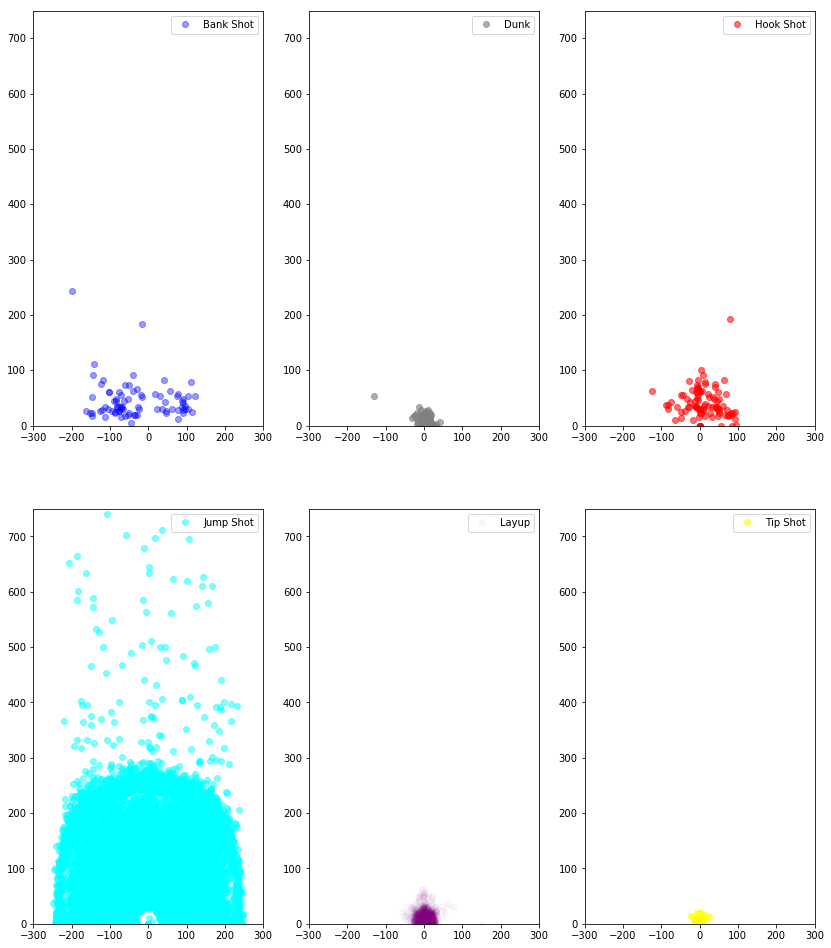

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# combined shot types
groups = trn_total.groupby('combined_shot_type')
court_scale = 14
alphas = []
colors = ['blue', 'gray', 'red', 'cyan', 'purple', 'yellow']

for u in [i[0] for i in groups]:
    d = len(trn_total.loc[trn_total.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(np.log1p(d))

# 실제 농구 코트 비율 28 : 15
fig, ax = plt.subplots(2, 3, figsize=(court_scale, court_scale*(18/15)))

for i, ((name, group), alp, col) in enumerate(zip(groups, alphas, colors)):
    x = i//3
    y = i%3
    ax[x, y].set_autoscale_on(False)
    ax[x, y].margins(0.05) # Optional, just adds 5% padding to the autoscaling
    ax[x, y].axis([-300,300,0,750])
    ax[x, y].plot(group.loc_x, group.loc_y, marker='.', linestyle='', ms=12, label=name, alpha=alp, color=col)
    ax[x, y].legend()

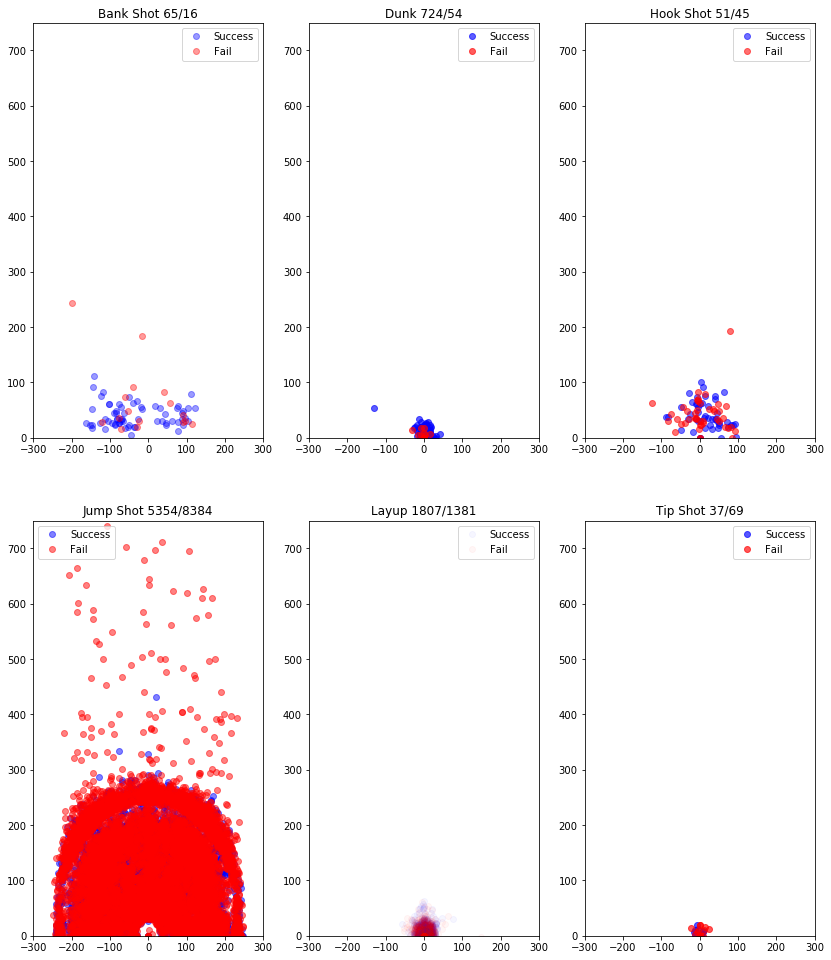

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# combined shot types
groups = trn_total.groupby('combined_shot_type')
court_scale = 14
alphas = []

for u in [i[0] for i in groups]:
    d = len(trn_total.loc[trn_total.combined_shot_type == u, 'combined_shot_type'])
    alphas.append(np.log1p(d))

# 실제 농구 코트 비율 28 : 15
fig, ax = plt.subplots(2, 3, figsize=(court_scale, court_scale*(18/15)))

for i, ((name, group), alp) in enumerate(zip(groups, alphas)):
    # 순서대로 plot 위치를 정해줌
    x = i//3
    y = i%3
    
    # 각각의 plot의 parameter setting
    ax[x, y].set_autoscale_on(False)
    ax[x, y].margins(0.05) # Optional, just adds 5% padding to the autoscaling
    ax[x, y].axis([-300,300,0,750])
    
    # 파랑이 성공, 빨강이 실패
    ax[x, y].plot(group[group.shot_made_flag == 1].loc_x, group[group.shot_made_flag == 1].loc_y, marker='.', 
                                                                                linestyle='', ms=12, label='Success', alpha=alp, color='blue')
    ax[x, y].plot(group[group.shot_made_flag != 1].loc_x, group[group.shot_made_flag != 1].loc_y, marker='.', 
                                                                                linestyle='', ms=12, label='Fail', alpha=alp, color='red')
    ax[x, y].legend()
    
    # title 지정
    score =  ' ' + str(len(group[group.shot_made_flag == 1])) + '/' +str(len(group[group.shot_made_flag != 1]))
    ax[x, y].title.set_text(name + score) # 성공한 슛/실패한 슛




## 2-3 game_event_id, game_id

In [17]:
for i in range(5):
    print(X.iloc[i].game_event_id, X.iloc[i].game_id)

12 20000012
35 20000012
43 20000012
155 20000012
244 20000012


- game_id는 한 경기당 부여되는 id
- game_event_id는 한 경기에 발생하는 event(i.e. shot) id

## 2-4 lat-lon, loc_x, loc_y 

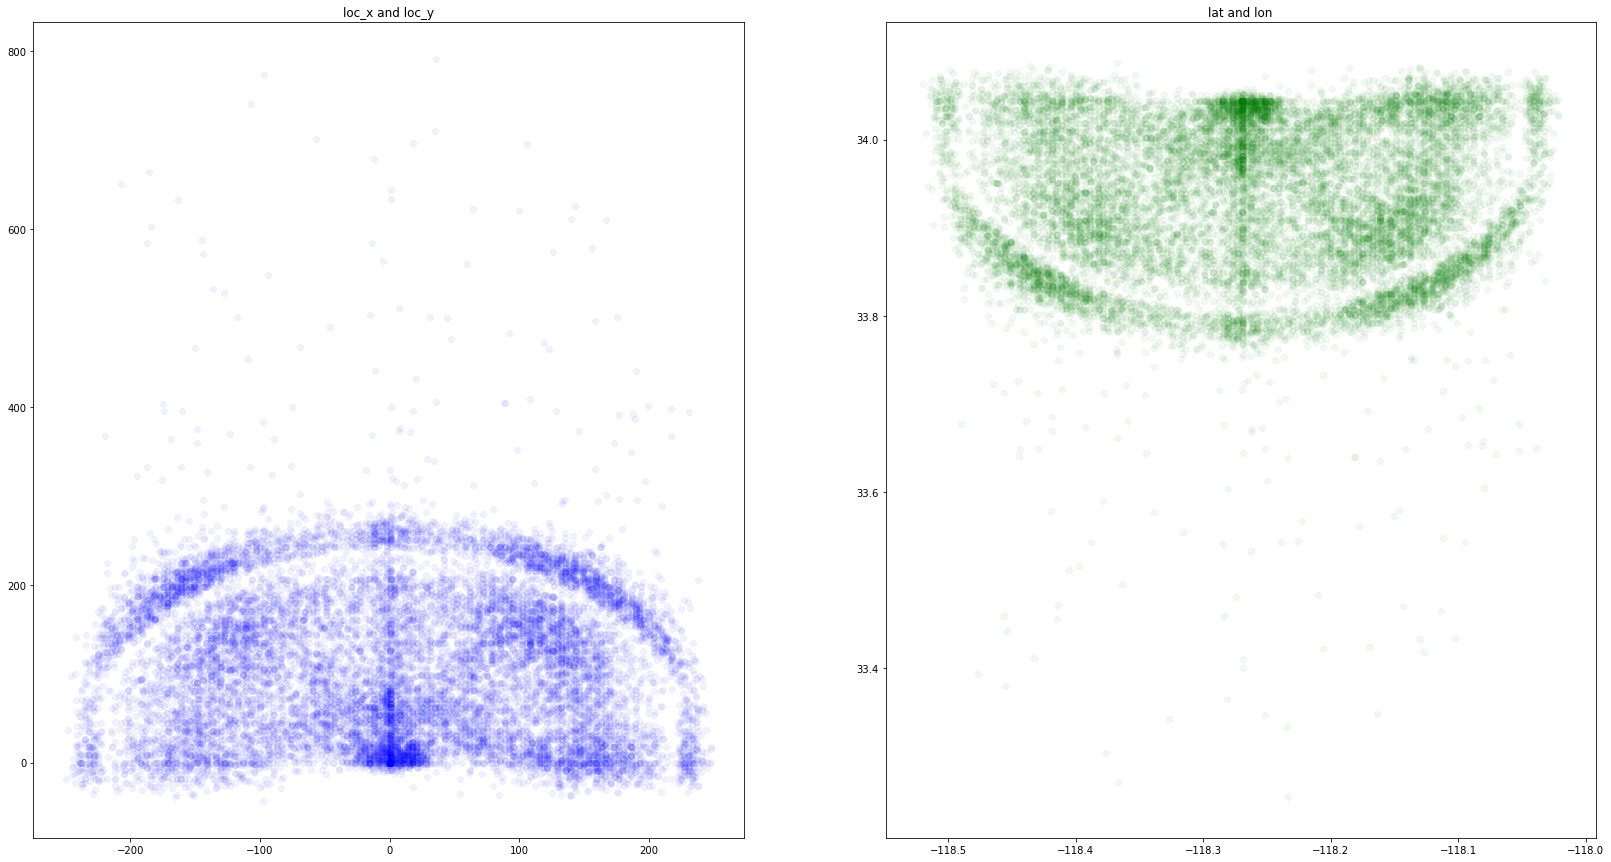

In [18]:
# plot 전체 size를 설정
plt.figure(figsize=(28,15))
alpha = 0.05 # plot 하나의 진하기 결정, 클수록 진한 포인트

# loc_x and loc_y
plt.subplot(121) # 1X2 map에 1번째 그림
plt.scatter(trn_x.loc_x, trn_x.loc_y, color='b', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122) # 1X2 map에 2번째 그림
plt.scatter(trn_x.lon, trn_x.lat, color='g', alpha=alpha)
plt.title('lat and lon')


- lat-lon과 loc_x, loc_y는 shot의 위치를 나타내는 동일 정보

### 2-5 shot distance - 성공률

In [19]:
# Shooting accuracy with shot distance
def get_acc(df, against):
    ct = pd.crosstab(df.shot_made_flag, df[against]).apply(lambda x:x/x.sum(), axis=0)
    x, y = ct.columns, ct.values[1, :]
    plt.figure(figsize=(20, 5))
    plt.plot(x, y)
    plt.xlabel(against)
    plt.ylabel('% shots made')
    plt.savefig(against + '_vs_accuracy.png')

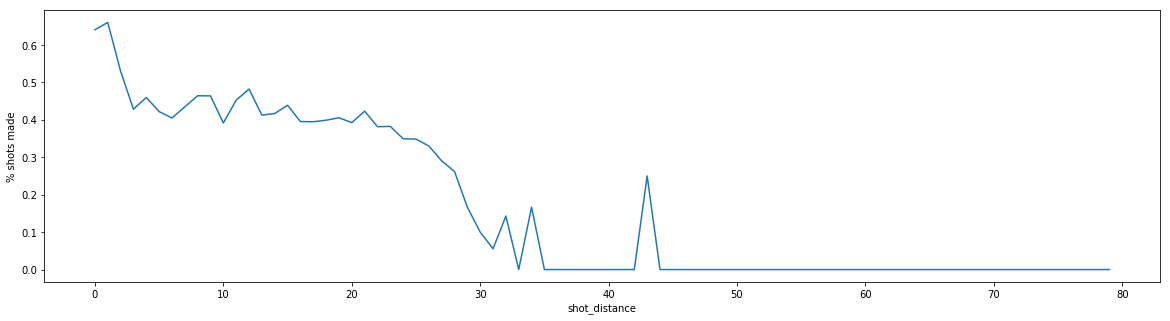

In [20]:
get_acc(trn_total, 'shot_distance')

## 2-6 remaining time - 성공률

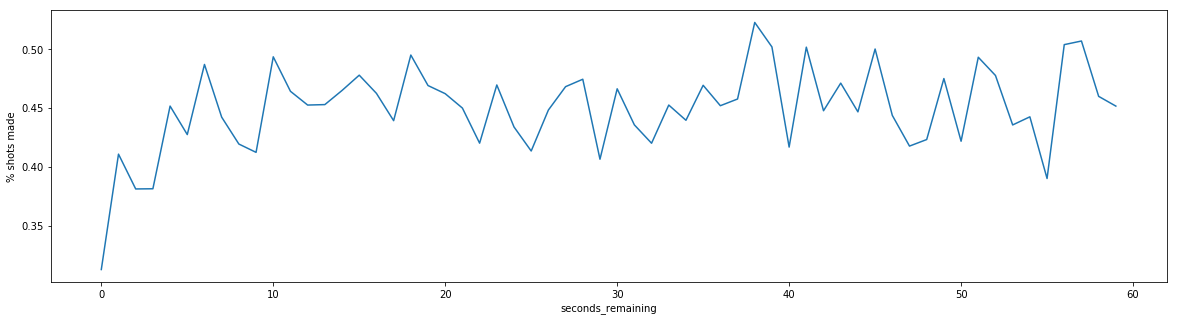

In [21]:
# What can we learn from time?
get_acc(trn_total, 'seconds_remaining')

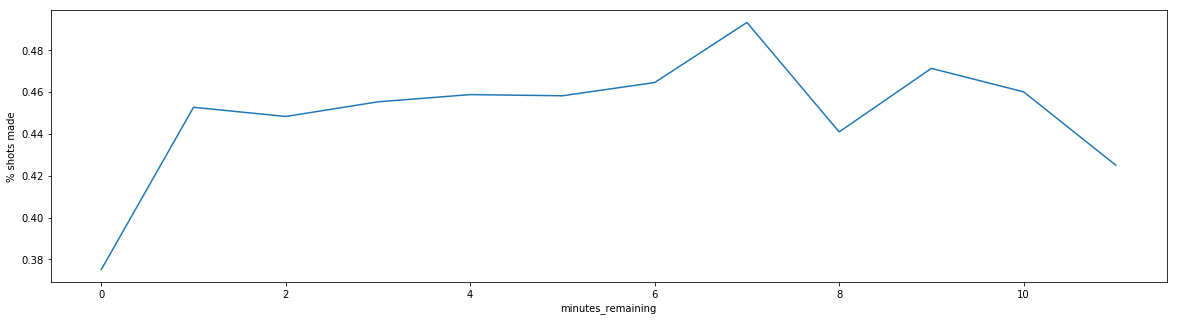

In [22]:
get_acc(trn_total, 'minutes_remaining')

### 초와 분만 가지고 보는건 의미가 없음
- remaing_seconds + remaing_minutes를 seconds_from_period_end으로 변환
- seconds_from_period_end = 60 * remaing_minutes + remaing_seconds

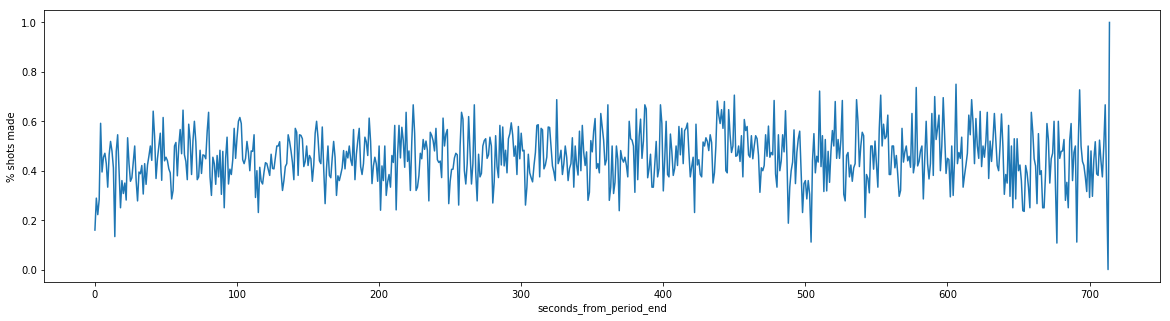

In [23]:
trn_total['seconds_from_period_end'] = 60 * trn_total['minutes_remaining'] + trn_total['seconds_remaining']
get_acc(trn_total, 'seconds_from_period_end')

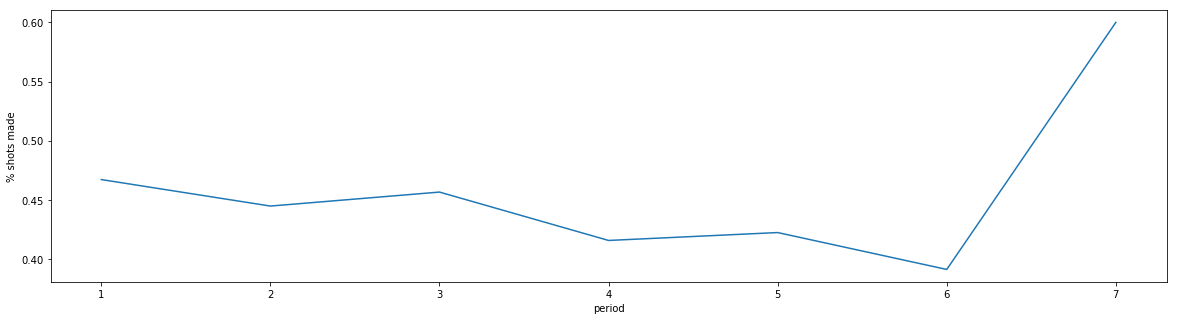

In [24]:
get_acc(trn_total, 'period')

## 2-7 시즌에 따른 성공률

['2012-13' '1999-00' '2011-12' '2009-10' '1996-97' '2008-09' '2002-03'
 '2006-07' '2007-08' '2014-15' '1997-98' '2000-01' '2010-11' '1998-99'
 '2015-16' '2001-02' '2003-04' '2005-06' '2004-05' '2013-14']


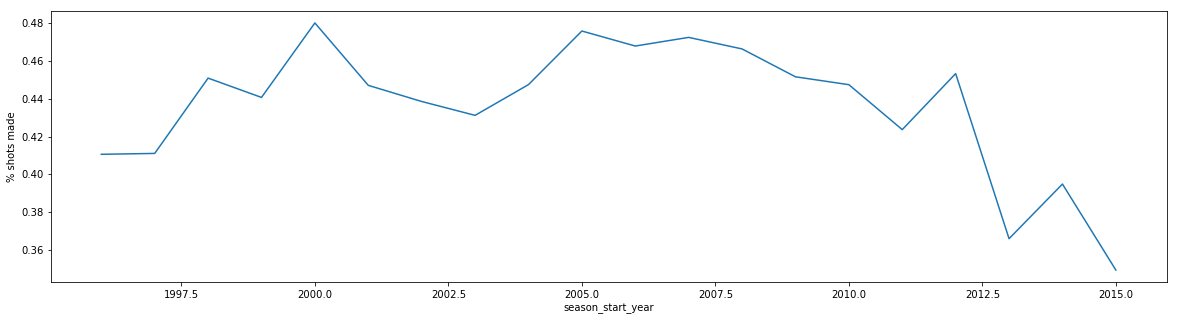

In [25]:
print(trn_total.season.unique())

# 연도만 분리
trn_total['season_start_year'] = trn_total.season.str.split('-').str[0]

# integer로 변환
trn_total['season_start_year'] = trn_total['season_start_year'].astype(int)

get_acc(trn_total, 'season_start_year')

- 마지막 season에는 유난히 슛 성공률이 낮은 것을 확인할 수 있음

## 2-8 Shot zone

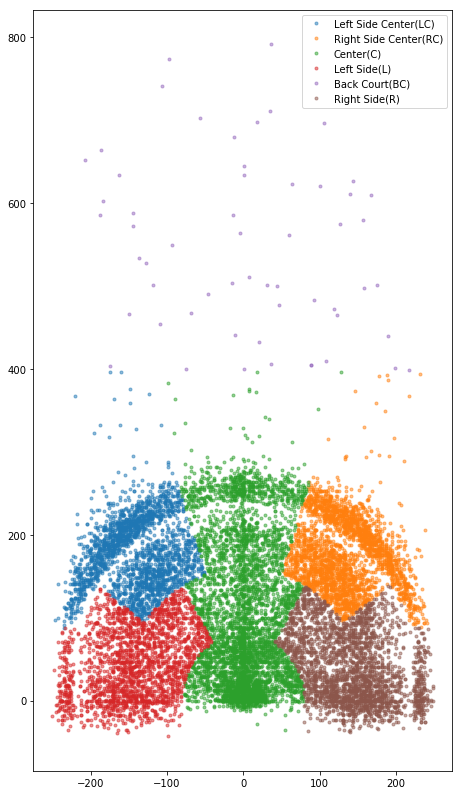

In [26]:
plt.figure(figsize=(7.5,14))

for zone in set(trn_x.shot_zone_area):
    plt.plot(trn_x[trn_x.shot_zone_area == zone].loc_x, trn_x[trn_x.shot_zone_area == zone].loc_y, marker='.', linestyle='', alpha = 0.5, label=zone)
    plt.legend()

### zone에 따라 success/fail 분포 살펴보기

In [27]:
def group_sf(data, category):
    # combined shot types
    groups = data.groupby(category)
    n = len(set(data[category]))
    k = (n+1)//2
    # 실제 농구 코트 비율 28 : 15
    fig, ax = plt.subplots(2, k, figsize=(court_scale, court_scale*(20/15)))

    for i, (name, group) in enumerate(groups):
        x = i//k
        y = i%k
        ax[x, y].set_autoscale_on(False)
        ax[x, y].margins(0.05) # Optional, just adds 5% padding to the autoscaling
        ax[x, y].axis([-300,300,0,750])

        # 파랑이 성공, 빨강이 실패
        ax[x, y].plot(group[group.shot_made_flag == 1].loc_x, group[group.shot_made_flag == 1].loc_y, marker='.', 
                                                                                    linestyle='', ms=12, label='Success', alpha=0.5, color='b')
        ax[x, y].plot(group[group.shot_made_flag != 1].loc_x, group[group.shot_made_flag != 1].loc_y, marker='.', 
                                                                                    linestyle='', ms=12, label='Fail', alpha=0.5, color='r')
        ax[x, y].legend()
        # title 지정
        score =  ' ' + str(len(group[group.shot_made_flag == 1])) + '/' +str(len(group[group.shot_made_flag != 1]))
        ax[x, y].title.set_text(name + score) # 성공한 슛/실패한 슛

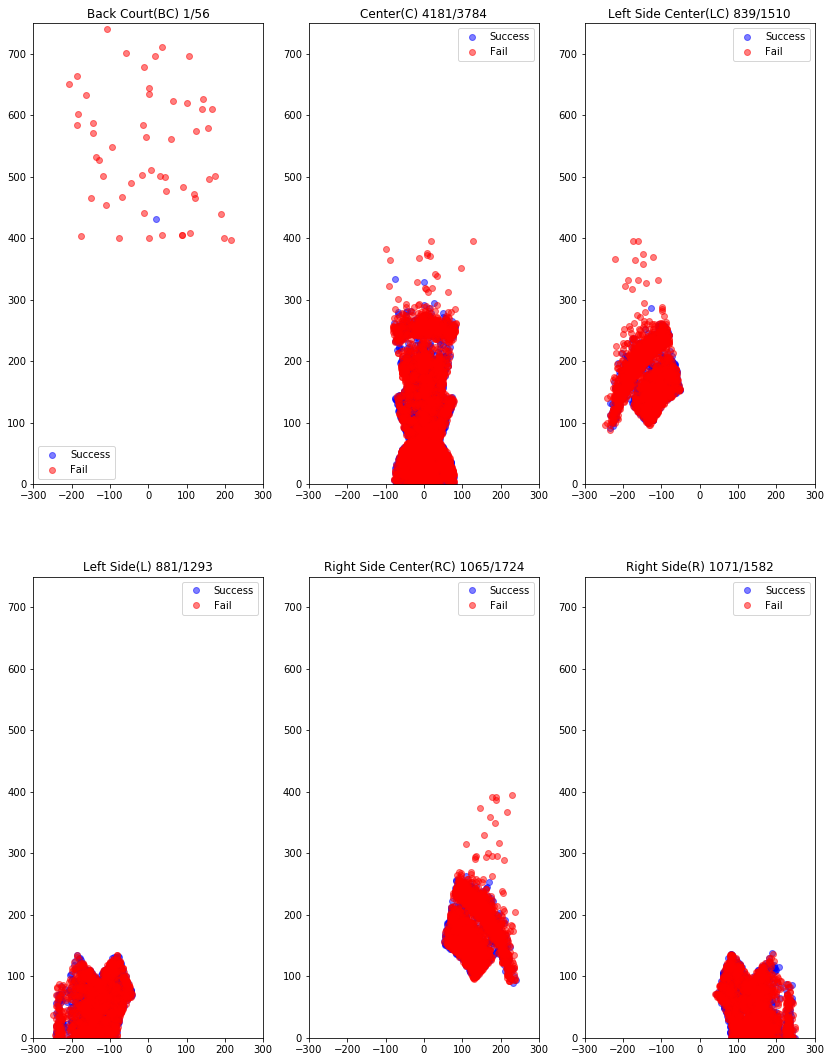

In [28]:
group_sf(trn_total,'shot_zone_area')

### shot 방향에 따른 성공률 차이

In [29]:
# 왼쪽과 오른쪽의 슛 성공률의 차이가 크게 있지 않음
pd.crosstab(trn_total.shot_made_flag,trn_total.shot_zone_area).apply(lambda x: x/sum(x))

shot_zone_area,Back Court(BC),Center(C),Left Side Center(LC),Left Side(L),Right Side Center(RC),Right Side(R)
shot_made_flag,,,,,,
0.0,0.982456,0.475078,0.642827,0.594756,0.618143,0.596306
1.0,0.017544,0.524922,0.357173,0.405244,0.381857,0.403694


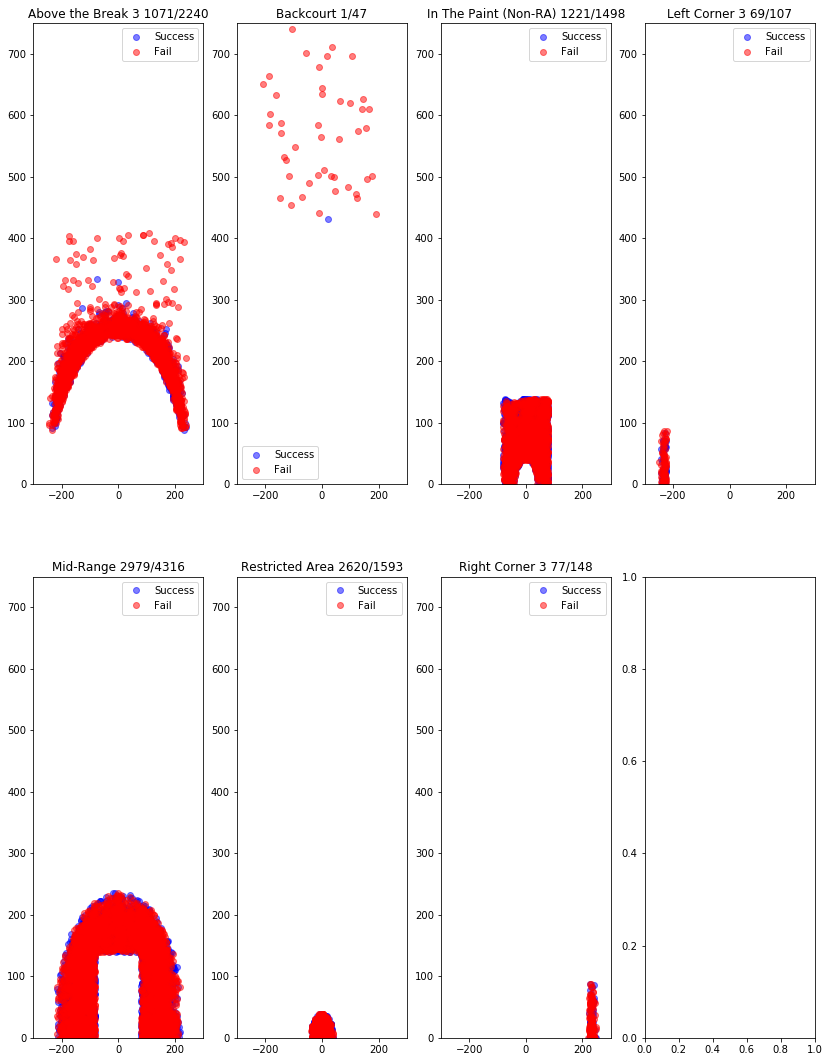

In [30]:
group_sf(trn_total, 'shot_zone_basic')

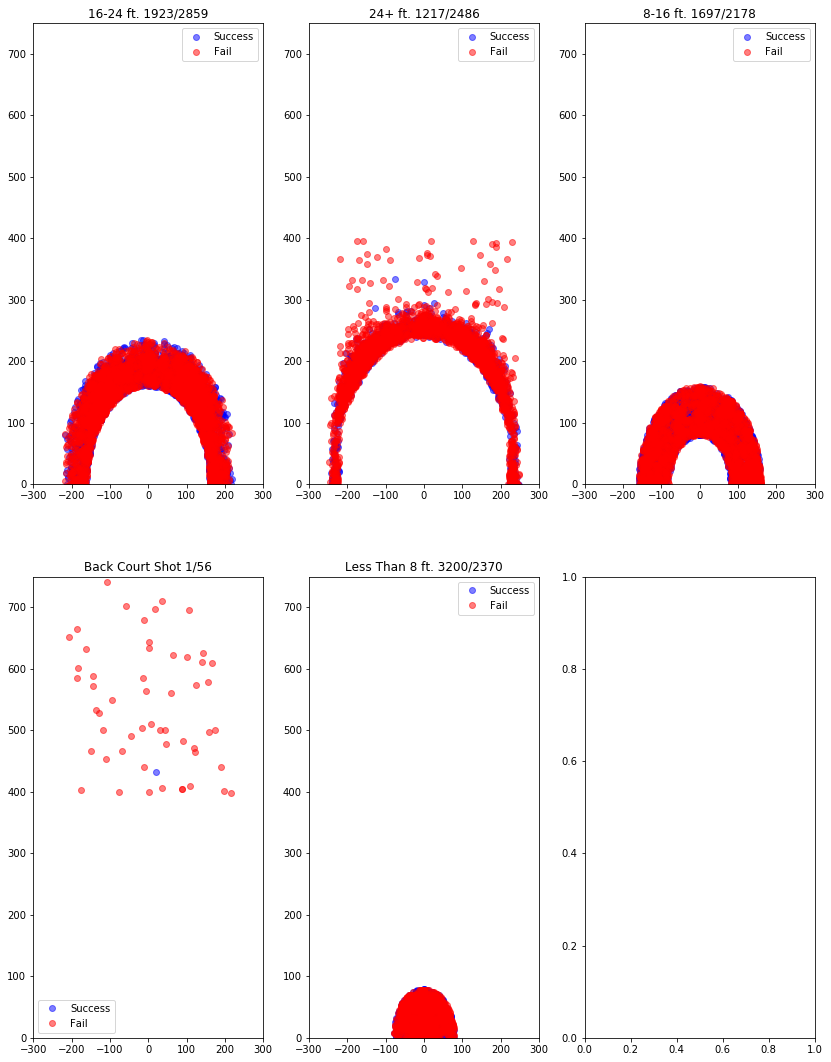

In [31]:
group_sf(trn_total,'shot_zone_range')

* 단변량 값으로 뚜렷하게 Success/fail이 나눠지는 값이 없음

## 2-9 Matchup, opponent

In [ ]:
print(set(trn_total.team_id))
print(set(trn_total.team_name))
print(set(trn_total.matchup)) # vs는 home // @ away
print(set(trn_total.opponent))

In [ ]:
print(trn_total.iloc[0,:].matchup)
print(trn_total.iloc[0,:].opponent)

* matchup 정보와 opponent는 동일 정보!